<a href="https://colab.research.google.com/github/mrzResearchArena/TF-2.X/blob/master/Linear-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
import sklearn
import numpy as np
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0-rc1


In [0]:
from sklearn.datasets import load_breast_cancer 
D = load_breast_cancer()

In [33]:
D.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [34]:
X = D['data']
# X.shape # --> (569, 30)
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [35]:
Y = D['target']
# Y.shape # --> (569,)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [36]:
# from sklearn.utils import shuffle
X, Y = sklearn.utils.shuffle(X, Y)
Y

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [0]:
def Label(Y):
    v = np.zeros(shape=(len(Y), len(set(Y))))
    for i in range(len(Y)):
        v[i, Y[i]] = 1
    
    return v


In [38]:
Y = Label(Y)
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [39]:
D['target_names'] # malignant --> 0 and benign --> 1

array(['malignant', 'benign'], dtype='<U9')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler()

X_train = z.fit_transform(X_train)
X_test = z.transform(X_test)

In [42]:
N, D = X_train.shape
print(N, D)

381 30


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D)),
    tf.keras.layers.Dense(units=2, activation='softmax')                             
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
)
# 'adam'

In [45]:
result = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200)

Train on 381 samples, validate on 188 samples
Epoch 1/200
381/381 [==============================] - 1s 1ms/sample - loss: 0.7554 - accuracy: 0.5932 - val_loss: 0.6116 - val_accuracy: 0.6649
Epoch 2/200
381/381 [==============================] - 0s 161us/sample - loss: 0.6422 - accuracy: 0.6877 - val_loss: 0.5125 - val_accuracy: 0.7606
Epoch 3/200
381/381 [==============================] - 0s 168us/sample - loss: 0.5532 - accuracy: 0.7585 - val_loss: 0.4392 - val_accuracy: 0.7979
Epoch 4/200
381/381 [==============================] - 0s 163us/sample - loss: 0.4874 - accuracy: 0.7848 - val_loss: 0.3828 - val_accuracy: 0.8298
Epoch 5/200
381/381 [==============================] - 0s 165us/sample - loss: 0.4371 - accuracy: 0.8215 - val_loss: 0.3385 - val_accuracy: 0.8564
Epoch 6/200
381/381 [==============================] - 0s 203us/sample - loss: 0.3956 - accuracy: 0.8425 - val_loss: 0.3049 - val_accuracy: 0.8936
Epoch 7/200
381/381 [==============================] - 0s 162us/sample - l

In [0]:
Yp = model.predict(X_test)

In [47]:
print('Training Accuracy: {}'.format(model.evaluate(X_train, Y_train)))
print('Testing Accuracy: {}'.format(model.evaluate(X_test, Y_test)))

# # Evaluate the model - evaluate() returns loss and accuracy
# print("Train score:", model.evaluate(X_train, Y_train))
# print("Test score:", model.evaluate(X_test, Y_test))

381/381 [==============================] - 0s 98us/sample - loss: 0.0661 - accuracy: 0.9816
Training Accuracy: [0.06607305052203769, 0.9816273]
188/188 [==============================] - 0s 102us/sample - loss: 0.0711 - accuracy: 0.9787
Testing Accuracy: [0.0711331824038891, 0.9787234]


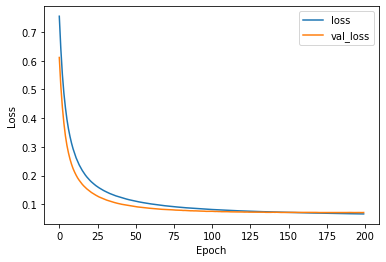

In [48]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

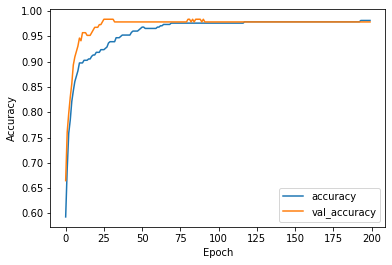

In [49]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [51]:
Yp

array([[1.18993353e-02, 9.88100648e-01],
       [3.88544708e-09, 1.00000000e+00],
       [5.51108951e-06, 9.99994516e-01],
       [3.17995756e-07, 9.99999642e-01],
       [9.99997735e-01, 2.26001794e-06],
       [2.77268373e-05, 9.99972224e-01],
       [1.00000000e+00, 1.47703583e-08],
       [4.18233797e-02, 9.58176613e-01],
       [3.14084231e-03, 9.96859193e-01],
       [9.71837640e-01, 2.81623155e-02],
       [9.93236482e-01, 6.76356908e-03],
       [7.98630845e-06, 9.99992013e-01],
       [1.00000000e+00, 1.92650496e-09],
       [9.16164427e-04, 9.99083877e-01],
       [9.92620945e-01, 7.37905782e-03],
       [4.69635037e-04, 9.99530435e-01],
       [2.25887983e-03, 9.97741103e-01],
       [6.04628678e-03, 9.93953764e-01],
       [9.99999881e-01, 9.53833776e-08],
       [1.86217930e-02, 9.81378198e-01],
       [1.91946831e-02, 9.80805278e-01],
       [9.91410434e-01, 8.58962256e-03],
       [7.76267052e-02, 9.22373295e-01],
       [3.73110324e-02, 9.62688982e-01],
       [1.015290

In [52]:
# v = np.argmax(Yp, axis=1, keepdims=True)
# v
v = np.round(Yp)

C = 0
for real, pred in zip(Y_test, v):
    if real[0] == pred[0] and real[1] == pred[1]:
        C += 1

print(C/len(v)) 

0.9787234042553191


In [53]:
Yproba = model.predict_proba(X_test)
Yproba

array([[1.18993353e-02, 9.88100648e-01],
       [3.88544708e-09, 1.00000000e+00],
       [5.51108951e-06, 9.99994516e-01],
       [3.17995756e-07, 9.99999642e-01],
       [9.99997735e-01, 2.26001794e-06],
       [2.77268373e-05, 9.99972224e-01],
       [1.00000000e+00, 1.47703583e-08],
       [4.18233797e-02, 9.58176613e-01],
       [3.14084231e-03, 9.96859193e-01],
       [9.71837640e-01, 2.81623155e-02],
       [9.93236482e-01, 6.76356908e-03],
       [7.98630845e-06, 9.99992013e-01],
       [1.00000000e+00, 1.92650496e-09],
       [9.16164427e-04, 9.99083877e-01],
       [9.92620945e-01, 7.37905782e-03],
       [4.69635037e-04, 9.99530435e-01],
       [2.25887983e-03, 9.97741103e-01],
       [6.04628678e-03, 9.93953764e-01],
       [9.99999881e-01, 9.53833776e-08],
       [1.86217930e-02, 9.81378198e-01],
       [1.91946831e-02, 9.80805278e-01],
       [9.91410434e-01, 8.58962256e-03],
       [7.76267052e-02, 9.22373295e-01],
       [3.73110324e-02, 9.62688982e-01],
       [1.015290

## Model Save and Load

In [0]:
model.save('LR.h5')

In [0]:
modelLR = tf.keras.models.load_model('LR.h5')

In [57]:
modelLR.evaluate(X_test, Y_test)

188/188 [==============================] - 0s 540us/sample - loss: 0.0711 - accuracy: 0.9787


[0.0711331824038891, 0.9787234]

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [60]:
modelLR.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [61]:
!ls

LR.f5  LR.h5  sample_data


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [63]:
!pwd

/content


In [64]:
!ls

drive  LR.f5  LR.h5  sample_data


In [0]:
!cd drive

In [66]:
!ls

drive  LR.f5  LR.h5  sample_data


In [69]:
!ls drive/My\ Drive

 011-141-144.gdoc
'1 intro.pptx'
 5d242a18d36f5614.pdf
 Abril2014.arff
'account page.pdf'
 ACP-DL.gdoc
 ACT_111.pdf
 American_English.gdoc
'Andreas Müller-Introduction to Machine Learning with Python A Guide for Data Scientists.pdf'
 AntiCancerPeptides.gdoc
'Attendee 6 (Rafsanjani Muhammod)'
 Backup
 backup-TUD.gdoc
'bacteriophage proteins.gdoc'
'Badda Home Calculation:.gdoc'
 bangla_digits
'Baysian AI.gdoc'
 b.csv
 b.csv.gsheet
'Big Data with Python-1.gslides'
'Big Data with Python-2.gslides'
'Big Data with Python-3.gslides'
'Big Data with Python-4.gslides'
'bioinformatics ( CSE 493 )'
'Bioinformatics Current Research Topics.gdoc'
'Bioinformatics Dictionary.gdoc'
'Bioinformatics Papers Writing Techniques with Toha.gdoc'
 BioTool.gdoc
 Bk.zip
 BlackLists.gdoc
'Body Lotion.gslides'
'Book report (1).gdoc'
'Book report.gdoc'
'BSc_Official_Transcript (1).pdf'
 BSc_Official_Transcript.pdf
 ClassLectures
 Code.gsheet
'Colab Notebooks'
 ColorManuscript.zip
'Comparing!.gdoc'
 Copy.gdoc
'Copy 

In [0]:
!cp LR.h5 drive/My\ Drive

In [71]:
!ls drive/My\ Drive

 011-141-144.gdoc
'1 intro.pptx'
 5d242a18d36f5614.pdf
 Abril2014.arff
'account page.pdf'
 ACP-DL.gdoc
 ACT_111.pdf
 American_English.gdoc
'Andreas Müller-Introduction to Machine Learning with Python A Guide for Data Scientists.pdf'
 AntiCancerPeptides.gdoc
'Attendee 6 (Rafsanjani Muhammod)'
 Backup
 backup-TUD.gdoc
'bacteriophage proteins.gdoc'
'Badda Home Calculation:.gdoc'
 bangla_digits
'Baysian AI.gdoc'
 b.csv
 b.csv.gsheet
'Big Data with Python-1.gslides'
'Big Data with Python-2.gslides'
'Big Data with Python-3.gslides'
'Big Data with Python-4.gslides'
'bioinformatics ( CSE 493 )'
'Bioinformatics Current Research Topics.gdoc'
'Bioinformatics Dictionary.gdoc'
'Bioinformatics Papers Writing Techniques with Toha.gdoc'
 BioTool.gdoc
 Bk.zip
 BlackLists.gdoc
'Body Lotion.gslides'
'Book report (1).gdoc'
'Book report.gdoc'
'BSc_Official_Transcript (1).pdf'
 BSc_Official_Transcript.pdf
 ClassLectures
 Code.gsheet
'Colab Notebooks'
 ColorManuscript.zip
'Comparing!.gdoc'
 Copy.gdoc
'Copy 